## Seaborn Refresher

Let's review using Seaborn and Pandas to load up some data and then pair plot it.

We'll be using the same tools that we used last week for this 
- [pandas](pandas.pydata.org) for data handling (our dataframe library)
- [seaborn](seaborn.pydata.org) for _nice_ data visualization

Shortly we'll also by trying out:

- [scikit-learn](scikit-learn.org) an extensive machine learning library.
- [numpy](numpy.org) - a fundamental maths library best used by people with a strong maths background.  We won't explore it much today, but it does have some useful methods that we'll need.  It underlies all other mathematical and plotting tools that we use in Python.

We'll be using scikit-learn over the next few weeks, and it's well worth reading the documentation and high level descriptions.

As before, the aim is to get familiar with code-sharing workflows - so we will be doing pair programming for the duration of the day! _You will probably want to take a moment to look at the documentation of the libraries above - especially pandas_

The other useful resource is Stack Overflow - if you have a question that sounds like 'how do I do {x}' then someone will probably have answered it on SO. Questions are also tagged by library so if you have a particular pandas question you can do something like going to https://stackoverflow.com/questions/tagged/pandas (just replace the 'pandas' in the URL with whatever library you're trying to use.

Generally answers on SO are probably a lot closer to getting you up and running than the documentation. Once you get used to the library then the documentation is generally a quicker reference. We will cover strategies for getting help in class.

## Git links

We will be working through using GitHub and GitKraken to share code between pairs. We will go through all the workflow in detail in class but here are some useful links for reference:

- GitKraken interface basics: https://support.gitkraken.com/start-here/interface
- Staging and committing (save current state -> local history): https://support.gitkraken.com/working-with-commits/commits
- Pushing and pulling (sync local history <-> GitHub history): https://support.gitkraken.com/working-with-repositories/pushing-and-pulling
- Forking and pull requests (request to sync your GitHub history <-> someone else's history - requires a _review_):
  - https://help.github.com/articles/about-forks/
  - https://help.github.com/articles/creating-a-pull-request-from-a-fork/

## Step 1: Read in the dataset and pairplot

For this exercise, we will be using the Tips dataset that you can find in the same directory as this notebook.  This is a widely used dataset in machine learning, and while not related to minerals and energy, it is sufficient for our purpose.  The dataset relates total bills at US restaurants to tip size, as well as the sex of the tipper, whether they smoke, the day of the week, the kind of meal, and the number of people.

In pairs work out how to read this data into a pandas dataframe, then use Seaborn to pairplot the species in the dataset.

Seaborn happens to have this dataset built in.  Run the next cell to see the built in data.  Then modify the code to open the dataset from a CSV file.  The dataset can take a little while to load, so be patient - the dataset will appear.

In [1]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [2]:
import pandas as pd

In [4]:
tips = pd.read_csv('../data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Step 2 : Find a linear regression with Seaborn

Now that you've seen some pairplots (tips vs tip size are the most meaningful comparisons), use Seaborn to find lines of best fit in this dataset.

There are a few different ways to do this.  Try using regplot.

You may notice a "FutureWarning".  Ignore this - Python is often in a state of flux and these types of warning are common.  Often with major packages like Seaborn you'll find that a soon-to-be-released version of the library will not create these warnings.

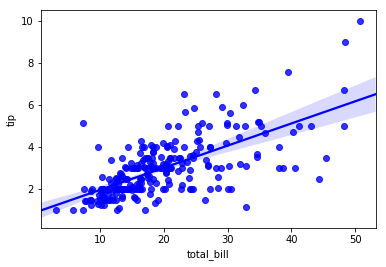

In [9]:
sns.regplot("total_bill", "tip",data=tips,scatter=True, color="blue")

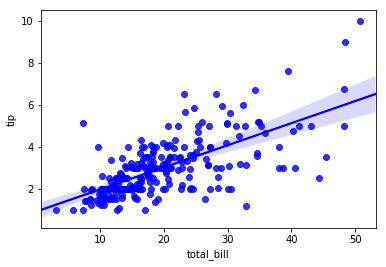

In [13]:
sns.regplot("total_bill", "tip",data=tips,scatter=True, color="blue")

## Step 3: Linear regression with scikit-learn

Scikit-learn provides machine learning tools in several categories.  These include supervised learning and unsupervised learning.  We'll start working with unsupervised learning next week.  Supervised learning is about finding a model for features that can be measured and some labelling that we have for the available data.  If, for example, we have lithium assays and we want to try to predict lithium based on sensor data from a portable spectrometer, then the lithium assays are the labels and the measured intensities at different wavelengths are the measured features.  This kind of supervised learning is called regression.

There's another kind of supervised learned which is called classification, this is what we're doing when we want to assign observed data to different discrete classes.  Regression can sometimes be used, with minor additions, to classify data as well.  For example, with our lithium spectral regression model we could classify samples as being high in lithium or low in lithium simply by using a threshold value that we set.  There are more sophisticated ways to classify, which will be covered in later weeks.

We use the estimator API of scikit-learn to do regression.

### The Estimator API of scikit-learn

There are a few steps to follow when using the estimator API.  These steps are the same for all methods that scikit-learn implements, not just for linear regression.

1. Choose a class of model by importing the appropriate estimator class.  In our case we want to import Linear Regression.  Here's how we can do it.

First import LinearRegression from scikit-learn.  Use this code:

```from sklearn.linear_model import LinearRegression```

In [14]:
from sklearn.linear_model import LinearRegression

Now create an "instance" of the LinearRegression class.  We can do it like this:

```model = LinearRegression(fit_intercept=True)```

To check that this has worked look at the model object after it's created.  It should tell you about some of its settings.

```model```

In [16]:
model = LinearRegression(fit_intercept=True) 
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

These settings are also called hyperparameters.  We'll encounter hyperparameters again next week, and will talk about them in more detail then.  They're often very important in working out whether our model is well fitted to the data.

2. Next we need to arrange a pandas dataframe (like "tips") into a features matrix and a target vector.

Search on the Internet for this.  I know that Stack Overflow will be helpful.  You will need to look at the column names in the dataframe to find the names of the two columns that are important to us.  Do this in the next cell.

The notation is a bit strange!  The two pairs of "[ ]" as "[[ ]]" that you will see is correct.

In [18]:
LinearRegression?

3. Fit the model to your data by using the fit() method of the LinearRegression object.

Again, look at the documentation for how to apply this.  You'll need to provide your features matrix (X) and target vector (y) as parameters to the fit method.

#### Congratulations you've trained your first machine learning model!

As this is a two dimensional linear model, it has two parameters.  The line's intercept and slope.  The notation that scikit-learn uses is a little unfriendly.  Its convention is to add underscores to the names of the parameters it finds.  Also, it calls the slope "coef".

After fitting the model, find the coefficients with ```model.coef_``` and ```model._intercept_```.

In [20]:
target = tips['tip']
target

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
5      4.71
6      2.00
7      3.12
8      1.96
9      3.23
10     1.71
11     5.00
12     1.57
13     3.00
14     3.02
15     3.92
16     1.67
17     3.71
18     3.50
19     3.35
20     4.08
21     2.75
22     2.23
23     7.58
24     3.18
25     2.34
26     2.00
27     2.00
28     4.30
29     3.00
       ... 
214    6.50
215    1.10
216    3.00
217    1.50
218    1.44
219    3.09
220    2.20
221    3.48
222    1.92
223    3.00
224    1.58
225    2.50
226    2.00
227    3.00
228    2.72
229    2.88
230    2.00
231    3.00
232    3.39
233    1.47
234    3.00
235    1.25
236    1.00
237    1.17
238    4.67
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [45]:
x=tips[['total_bill']]
x.head()

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59


In [44]:
y=tips['tip']
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [38]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
model.coef_

array([0.10502452])

In [41]:
model.intercept_

0.9202696135546731

In [46]:
predicted_tip = model.predict(20)
predicted_tip

array([3.02075996])

#### Now that we've trained a model, we should make predictions!

6. Make predictions!

This is also more complicated with scikit-learn than it is with Seaborn.

For a given, single value for a feature (ie a meal cost) we can predict a label.  For example, for a meal cost of $20, we could make a prediction with:

```predicted_tip = model.predict(20)```

But to find the smooth line that seaborn finds we need to explicitly tell scikit-learn that we want to do a prediction for all of the meal costs that we're interested in.  To do this we
use a new library called "numpy" and a method called linspace (which is short for linear spacing).

First we need to import numpy.

```import numpy as np```

While I used predicted_tip above as an example of a predicted target array, and 20 is an example of x, I'll now switch to the usual y and x conventions used in tutorials with scikit-learn.  You can of course use any variables names you, and in your own code it's best to use descriptive names that mean something in the domain of your industry, like 'predicted_tip", or "octane_rating".

We need to use the linspace method in numpy.  Use it like this:

```xfit = np.linspace(0, 60)```

This will create a collection of meal costs, in order, starting from 0 dollars up to 60 dollars.  This is what we need, but this collection isn't formatted correctly for scikit-learn.  To make it work with scikit-learn we next have to adjust the format with this instruction:

```xfit_reshaped = xfit[:, np.newaxis]
yfit = model.predict(xfit_reshaped).```

yfit now contains our predicted tips.  Type ```yfit``` to see them numerically.

Try this all out in the next cell.  Take it step by step.  Don't try to run this all in one go, but build it up line by line, checking that you do not get errors after each line.

In [47]:
import numpy as np

In [48]:
xfit = np.linspace(0, 60)

In [50]:
xfit_reshaped = xfit[:, np.newaxis]
yfit = model.predict(xfit_reshaped)

In [51]:
xfit_reshaped = xfit[:, np.newaxis]
xfit

array([ 0.        ,  1.2244898 ,  2.44897959,  3.67346939,  4.89795918,
        6.12244898,  7.34693878,  8.57142857,  9.79591837, 11.02040816,
       12.24489796, 13.46938776, 14.69387755, 15.91836735, 17.14285714,
       18.36734694, 19.59183673, 20.81632653, 22.04081633, 23.26530612,
       24.48979592, 25.71428571, 26.93877551, 28.16326531, 29.3877551 ,
       30.6122449 , 31.83673469, 33.06122449, 34.28571429, 35.51020408,
       36.73469388, 37.95918367, 39.18367347, 40.40816327, 41.63265306,
       42.85714286, 44.08163265, 45.30612245, 46.53061224, 47.75510204,
       48.97959184, 50.20408163, 51.42857143, 52.65306122, 53.87755102,
       55.10204082, 56.32653061, 57.55102041, 58.7755102 , 60.        ])

In [52]:
yfit = model.predict(xfit_reshaped)
yfit

array([0.92026961, 1.04887106, 1.17747251, 1.30607396, 1.43467541,
       1.56327686, 1.69187831, 1.82047976, 1.94908121, 2.07768266,
       2.20628411, 2.33488556, 2.46348701, 2.59208846, 2.72068991,
       2.84929136, 2.97789281, 3.10649426, 3.23509571, 3.36369716,
       3.49229861, 3.62090006, 3.74950151, 3.87810296, 4.00670441,
       4.13530586, 4.26390731, 4.39250876, 4.52111021, 4.64971166,
       4.77831311, 4.90691456, 5.03551601, 5.16411746, 5.29271891,
       5.42132036, 5.54992181, 5.67852326, 5.80712471, 5.93572616,
       6.06432761, 6.19292906, 6.32153051, 6.45013196, 6.57873341,
       6.70733486, 6.83593631, 6.96453776, 7.09313921, 7.22174066])

We can also plot these results, but lets stop here.

We could use the default plotting functions that Pandas provides for this.  But for report purposes you may, in future, want to find out how to use Seaborn for this.

We can create dataframes from this data with code like:

```
DataFrame({'meal_cost':xfit, 'tips':yfit})
```

In [56]:
import pandas as pd
import numpy as np

### Exercise:  Create a linear function with scikit-learn.  Then add noise.

1. Scikit-learn includes a built in function to quickly create datasets for experimenting with the estimator API.

Find out about the make_regression method in sklearn.datasets.

Use this to make a noisy line with 100 samples.  Use n_features to set the number of features, and use noise to adjust gaussian noise that is added.

Add outliers and see how the fitting is impacted.  LinearRegression can report R^2 values.  Use the "score" method.  Google and Stack Overflow will help with usage.

In [62]:
df = pd.DataFrame({'meal_cost':xfit,'tips':yfit})

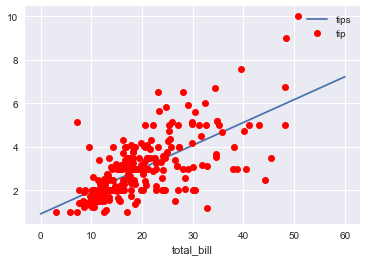

In [76]:
sns.set()
ax = df.plot('meal_cost','tips')
tips.plot('total_bill','tip',marker='o', linewidth =0,ax = ax,color='red')

### Exercise: Create a linear function with seaborn.  Then add noise.

While we'll be using scikit-learn over the next few weeks and it's helpful to keep working with it, it's really quite painful compared to Seaborn.  Looking at residuals is an exploratory task that Seaborn is better suited to than scikit-learn.

Try this code, which plots the residuals after gaussian noise is added to a simple y = x line.  Try to get the gist of how it works.

```
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

rs = np.random.RandomState(7)
x = rs.uniform(0, 100, 10000)
y = x + rs.normal(0, 1, 10000)

sns.residplot(x, y, lowess=True, color="g")
```

The RandomState object is part of the Numpy numerical package which we won't explore in detail at this time.  It is a collection of mathematics functions which underlies all other mathematical libraries that we've been using, such as Seaborn and scikit-learn.  RandomState is used for generating random numbers from distributions.

A uniform distribution means that all of the values that may be returned are equally likely.  When we throw dice we are sampling from a uniform distribution.  Here we tell Python that we want random numbers between 0 and 100, all equally likely, and we want 10000 of them.

A normal (or gaussian) distribution returns values which are most likely to be near the mean, falling off symetrically to either side.  It is the "bell" curve that you've seen many times.  Here we say that we want the error that we add to our simple line to have a mean of zero, and a standard deviation of 1.

Seaborn's residplot function plots the residuals after fitting a line to the data.  With a normal distribution we expect to see these residuals evenly scattered around zero.

An example of a heavy tailed distribution is the gamma distribution.  This is often used to model failure likelihood for machines.  Unlike the normal distribution it is not symmetric.  In quality control applications it quickly peaks after a short lifetime, but then has a long tail that extends many years into the future.  This makes sense as we expect most failures to be early in the life of a machine because of manufacturing faults, after that the failure time is less predictable, but we all know of machines or gadgets that seem to last forever.  Google will quickly bring up examples of the shape.

Try the code above again, but substitute ```rs.normal (0, 1, 10000)``` with ```rs.gamma(2, 2, 10000)```.

How would you change this code to create a heteroscadistic error?

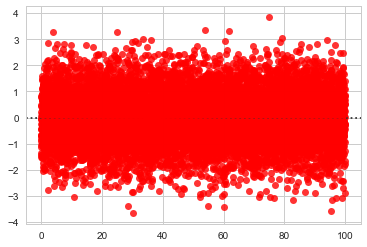

In [79]:
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

rs = np.random.RandomState(7)
x = rs.uniform(0, 100, 10000)
y = x + rs.normal(0, 1, 10000)

sns.residplot(x, y, lowess=True, color="r")

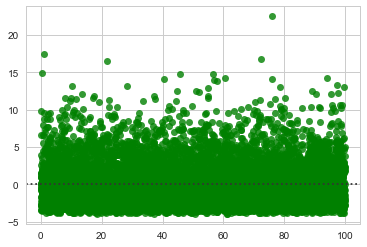

In [81]:
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

rs = np.random.RandomState(7)
x = rs.uniform(0, 100, 10000)
y = x + rs.gamma(2, 2, 10000)

sns.residplot(x, y, lowess=True, color="g")

### Exercise: Examine the linear dataset that you have brought

Find a least-squares fit using scikit-learn, and plot the residuals.  Are the residuals gaussian?  Is there homoscedasticity?  Do you have outliers?

In [83]:
metal = pd.read_csv('../data/metal_recovery_vs_sulphur.csv')
metal.head()

,Feed Sulphur,Metal Recovery
0,0.15,32.265845
1,0.23,45.957896
2,0.33,59.488374
3,0.31,50.121251
4,0.35,56.848414


### Exercise: Metal recovery vs %sulphur in feed

In this exercise we're going to look at a typical minerals engineering problem.  We have data collected in laboratory batch floatation tests on samples taken from different parts of a base metal orebody.  It appears that there is a simple relationship between metal recovery and the percent of sulphur in the sample.  We can see that recovery is increasing with sulphur.

1. Open and scatterplot the file metal_recovery_vs_sulphur.csv

In [88]:
df = pd.DataFrame({'Feed Sulphur':xfit,'Metal Recovery':yfit})

2. Find the least-squares linear fit for this data, without using any data transformations.  Plot the results.  Using Pandas and Seaborn may be the easiest way to approach this.

The results aren't terrible, but there are some problems.  There is a definite curve in the data and the line is unable to fit through all points.  It also poor at extrapolating.  This curve will happily predict greater than 100% recovery at feed sulphur beyond around 2%.  It's also happy to advise metal recoveries of around 40% with no feed sulphur.  That may seem reasonable to a data scientist, but domain experts will regard that as ridiculous.

3. Try transforming the sulphur feed percentages before fitting.  We'd like to know if the data can be made to look more linear through a simple algebraic relationship.  Domain knowledge may help here.  The general shape of the curve suggests that there may be a power relationship here.  What happens if you regress again the square root of feed sulphur?  What kind of transformation could lead a metal recovery that is limited below 100%?  Maybe it's worth trying the reciprocal of feed sulphur?

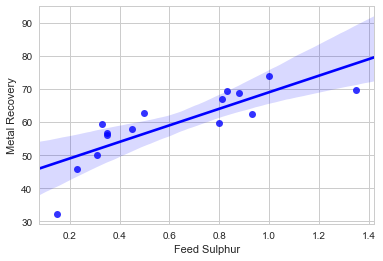

In [89]:
sns.regplot("Feed Sulphur", "Metal Recovery",data=metal,scatter=True, color="blue")

In [97]:
metal['Feed Sulphur SQR']=metal['Feed Sulphur']**0.5

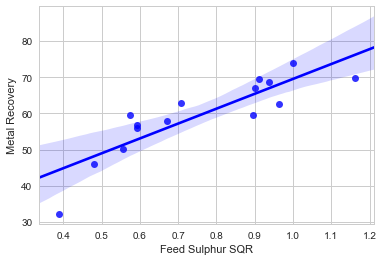

In [98]:
sns.regplot("Feed Sulphur SQR", "Metal Recovery",data=metal,scatter=True, color="blue")